In [29]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import dijkstra
import networkx as nx
import matplotlib.pyplot as plt

def exists_in(l,e):
    for i in l:
        if i == e:
            return True
    return False
def random_graph(Grid,N):
    l = []
    G = np.zeros((Grid,Grid))
    for i in range(N):
        a = np.random.randint(0,Grid)
        b = np.random.randint(0,Grid)
        while(exists_in(l,[a,b])):
            a = np.random.randint(0,Grid)
            b = np.random.randint(0,Grid)
        l.append([a,b])
    l = np.array(l)
    
    G = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            G[i][j] = np.linalg.norm(l[i]-l[j])
    return G



class Env:
   
    def __init__(self, N,size_Trucks):
        self.N = N
        self.size_Trucks = size_Trucks
        self.matrix = random_graph(N*2,N)
        #self.matrix = np.tril(self.matrix) + np.tril(self.matrix, -1).T
        #self.matrix = np.tril(self.matrix,-1) + np.triu(self.matrix,1)
        self.trucks = np.zeros((N,N))
        
    def Price(self):
        return np.sum(self.matrix * self.trucks%self.size_Trucks)
    def Cheapest_path(self,origin,destination):
        return
    

[[0.         3.         2.82842712 2.23606798 5.        ]
 [3.         0.         2.23606798 1.41421356 5.83095189]
 [2.82842712 2.23606798 0.         3.         3.60555128]
 [2.23606798 1.41421356 3.         0.         6.32455532]
 [5.         5.83095189 3.60555128 6.32455532 0.        ]]


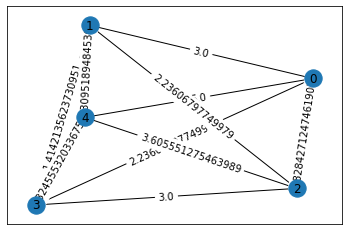

In [30]:
x = Env(5,10)
print(x.matrix)
#graph = csr_matrix(np.tril(x.matrix))
#print(graph)
G = nx.from_numpy_matrix(x.matrix)
pos=nx.spring_layout(G)
nx.draw_networkx(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
#nx.draw(G)

plt.show()

In [19]:
dist_matrix, predecessors = dijkstra(csgraph=graph, directed=False, indices=0, return_predecessors=True)
dist_matrix

array([0.        , 1.41421356, 2.23606798, 3.16227766])

In [83]:
predecessors

array([[-9999,     0,     0,     0],
       [    1, -9999,     1,     1],
       [    2,     2, -9999,     2],
       [    3,     3,     3, -9999]])